In [15]:
!pip3 install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 4.8 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [33]:
# Import wine data and explore first 20 rows

wine = pd.read_csv('Wine.csv')
wine.head(20)

# we are dealing with wine data, where we have a different wine and various details of the wine for each row 

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Rom√°n,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum √önico Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [34]:
# Explore numberical variables related to wines

wine.describe()

# The meaningful numerical variables relating to wines are 'points' and 'price'
# I can see the points are between 85 and 96 and there is little variance between them
# Price on the other hand varies quite a lot between 7 and 500 with a mean price of 40
# The rest of variables is categorical

,Unnamed: 0,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


In [4]:
# Check for missing values in all columns

missing_values_count = wine.isnull().sum()
print(missing_values_count[0:11])

# Print the total number of rows (wines) to get an idea of how much is missing
total_wines = wine.count()
print('The total number of wines is '+ str(total_wines[0]))

# It looks like the columns mising values are 'designation', 'price', 'region_1' snd 'region_2'


Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64
The total number of wines is 1103


I would replace the missing categorical viariables ('designation', 'region_1' and 'region_2') with 'Other'.
There is no way to guess the categorical variable but I don't think the rows or columns need to be dropped.
If the analysis would include price, I would drop the missing price rows since there is very little of them compared with the total data. However, if it would be valuable for the analysis to keep as much data as possible, they could be replaced with a mean value, or a K-nearest neighbours algorith could be used

<Figure size 432x288 with 0 Axes>

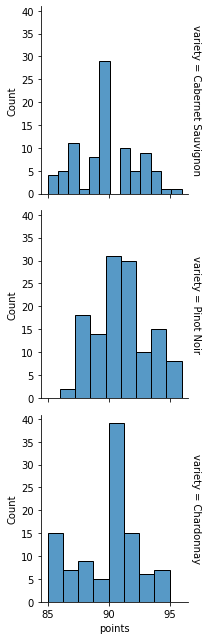

In [40]:
# Filter the data on 'Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay' wines and inspect
wines_selected = wine[wine['variety'].isin(['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay'])]
wines_selected.head(20)

# Plot and Display a grid of points histograms for each wine variety
plt.figure()
fg = sns.FacetGrid(wines_selected_points, row = 'variety', margin_titles = True)
fg.map(sns.histplot, 'points')
plt.show()
plt.close()

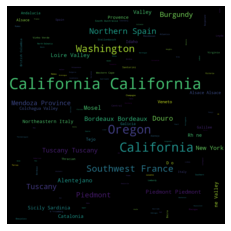

In [28]:
# Get the province data as a string
province_string = wine['province'].to_string()

# Create and display a word cloud of provinces
wordcloud = WordCloud(width=500, height=500, margin=10).generate(province_string)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

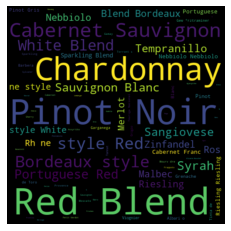

In [29]:
# Get the variety data as a string
variety_string = wine['variety'].to_string()

# Create and display a word cloud of varietis
wordcloud = WordCloud(width=500, height=500, margin=10).generate(variety_string)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()